Imports necessários para fazer os testes

In [35]:
import A_construct as c
import A_detect as d
import A_transform as t
import A_compilation as f

import cv2
import os
import numpy.random as random
import numpy as np
import matplotlib.pyplot as plt
import math

from __future__ import print_function
from imutils import perspective
from imutils import contours
import numpy as np
import cv2
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import statistics


Informação generalista:

In [36]:
#general data
caminho_cell=r"C:\Users\Asus\OneDrive - Universidade de Lisboa\TESE\Python\droplets"
n_cell=25
ov_percentage=1
diam_min=70
diam_max=300

probab_trans=0.3
probab_flat=0.2

tol_center=1
#a quantos raios pode estar o limite da bolha encontrada e o que eu lá meti
tol_rad=1

tol_branco=50
tol_inteiro=1

ENSAIO=100



In [37]:
#criar uma img_color=final_c
#tratar esta imagem e gerar a imagem com edges=canny_2 

caminho_bg=r"C:\Users\Asus\OneDrive - Universidade de Lisboa\TESE\Python\saved_pie\empty_re.png"

insert=c.insert_cell(caminho_bg,caminho_cell,n_cell,ov_percentage,diam_min,diam_max,probab_trans,probab_flat)
#esta é a imagem com cores
final_c=insert[0]
final_z=final_c.copy()
pos=insert[1]
rad=insert[2]

image_gray = cv2.cvtColor(final_c, cv2.COLOR_BGR2GRAY)
blur=t.median_filtering(image_gray)
contrast_2=t.apply_clahe_HE(blur,clip_limit=2.0, tile_size=(2,2))
Un_sharp=t.unsharp_masking(contrast_2,kernel_size=(15, 15), sigma=1.0, amount=3.0, threshold=0)
#esta é a imagem do canny
canny_2=t.apply_morphology_operations(t.my_canny(Un_sharp,low_threshold=30, high_threshold=65))

tresh=d.otsu_threshold(final_c)


BOA Implementação

23


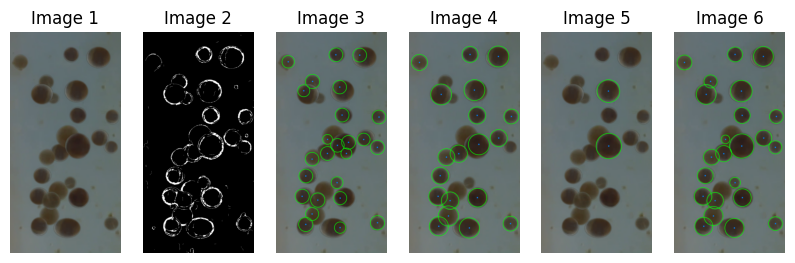

In [38]:


resultado=f.detect_circles_final(final_z,canny_2,tolerancia=10,tolerancia_int=1,minR=35,maxR=150)

lista=resultado[0]
print(len(lista))
first_image=resultado[1]
second_image=resultado[2]
third_image=resultado[3]

imagem_final=d.draw_green_circles(lista,final_z)




imagens=[final_c,canny_2,first_image,second_image,third_image,imagem_final]

f.display_images(imagens)

detetados 23
recall: 88.0
precision: 95.65217391304348
(2000, 1000, 3)


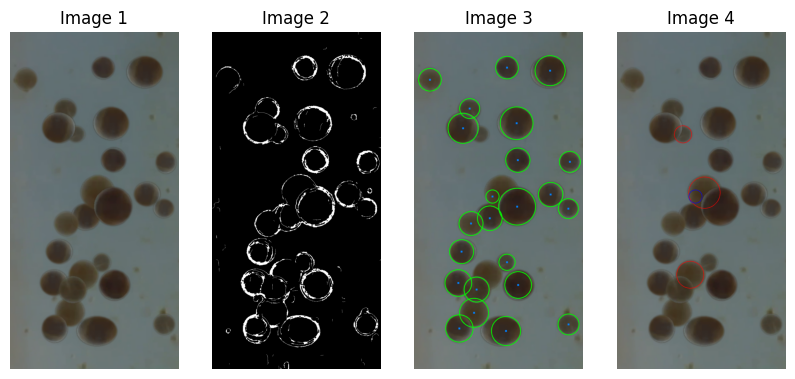

In [39]:

Valor=f.detect_circles_score(final_c,pos,rad,lista,tolerance=0.5,radius_margin=0.4)
print('recall:',Valor[0])
print('precision:',Valor[2])

print(final_c.shape)

imagens=[final_c,canny_2,imagem_final,Valor[1]]

f.display_images(imagens)

1
detetados 25
2
detetados 23
3
detetados 24
4
detetados 21
5
detetados 23
6
detetados 25
7
detetados 24
8
detetados 25
9
detetados 25
10
detetados 21
11
detetados 22
12
detetados 25
13
detetados 22
14
detetados 24
15
detetados 21
16
detetados 23
17
detetados 25
18
detetados 24
19
detetados 24
20
detetados 24
21
detetados 25
22
detetados 25
23
detetados 23
24
detetados 24
25
detetados 23
26
detetados 25
27
detetados 23
28
detetados 24
29
detetados 25
30
detetados 23
31
detetados 25
32
detetados 25
33
detetados 25
34
detetados 22
35
detetados 23
36
detetados 24
37
detetados 24
38
detetados 24
39
detetados 24
40
detetados 25
41
detetados 24
42
detetados 22
43
detetados 24
44
detetados 25
45
detetados 24
46
detetados 24
47
detetados 24
48
detetados 25
49
detetados 23
50
detetados 23
51
detetados 24
52
detetados 25
53
detetados 22
54
detetados 24
55
detetados 26
56
detetados 23
57
detetados 24
58
detetados 23
59
detetados 25
60
detetados 21
61
detetados 25
62
detetados 23
63
detetados 25
6

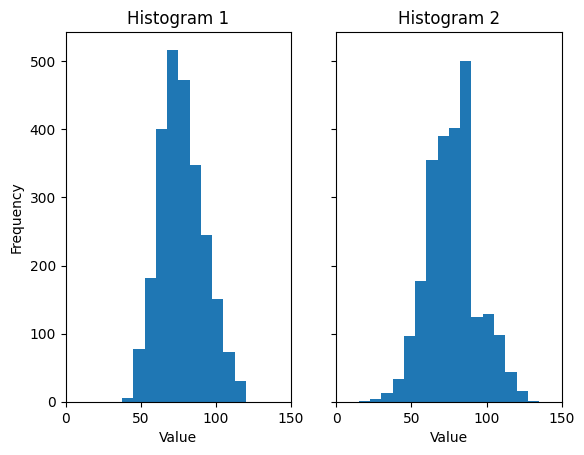

Sauter mean diameter for colocados: 85.4665753280096
Sauter mean diameter for encontrados: 87.53751911313537
A media dos diametros dos colocados é 77.31488
A media dos diametros dos encontrados é 77
A percentagem dos colocados encontrados é (Recall): 93.88
Precision: 98.411982437852


In [40]:
#HISTOGRAMA DOS COLOCADOS DO LADO ESQUERDO 
#HISTOGRAMA DOS ENCONTRADOS DO LADO DIREITO

n_ensaios=ENSAIO


#para dividir os bins nos mesmos intervalos


#print(one,two,tree,four)
colocados,verdes,recall_list,precision_list,Vol_placed, Vol_found=f.histrogram_data_final(n_ensaios,caminho_bg,caminho_cell,n_cell,ov_percentage,diam_min,diam_max,probab_trans,probab_flat)
bins = 20
x_range = (0, 150)

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Plot the first histogram
ax1.hist(colocados, bins=bins, range=x_range)
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram 1')

# Plot the second histogram
ax2.hist(verdes, bins=bins, range=x_range)
ax2.set_xlabel('Value')
ax2.set_title('Histogram 2')

# Set the x-axis range for both subplots
ax1.set_xlim(x_range)
ax2.set_xlim(x_range)

# Display the figure
plt.show()

import statistics

# List of radii for colocados


# Calculate the total volume of colocados spheres
colocados_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in colocados])

# Calculate the volume fraction of each colocados sphere
colocados_volume_fractions = [(4/3) * 3.14159 * radius**3 / colocados_total_volume for radius in colocados]

# Calculate the Sauter mean diameter for colocados
colocados_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(colocados, colocados_volume_fractions)])) / sum(colocados_volume_fractions)

# Calculate the total volume of verdes spheres
verdes_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in verdes])

# Calculate the volume fraction of each verdes sphere
verdes_volume_fractions = [(4/3) * 3.14159 * radius**3 / verdes_total_volume for radius in verdes]

# Calculate the Sauter mean diameter for verdes
verdes_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(verdes, verdes_volume_fractions)])) / sum(verdes_volume_fractions)

print("Sauter mean diameter for colocados:", colocados_sauter_mean_diameter)
print("Sauter mean diameter for encontrados:", verdes_sauter_mean_diameter)

# Calculate and print the statistics
print('A media dos diametros dos colocados é',statistics.mean(colocados))
print('A media dos diametros dos encontrados é',statistics.mean(verdes))
print('A percentagem dos colocados encontrados é (Recall):', statistics.mean(recall_list))
print('Precision:', statistics.mean(precision_list))


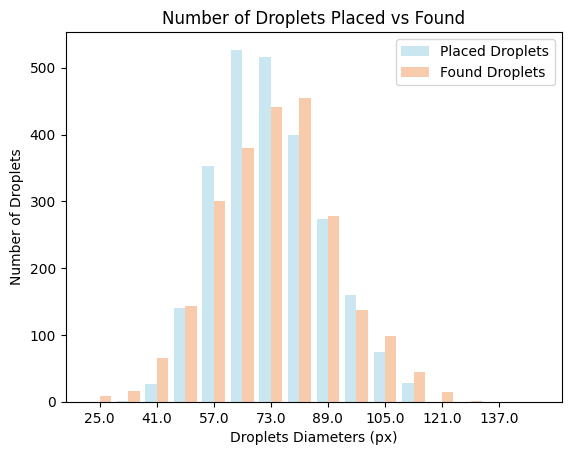

In [41]:
#histogram
import numpy as np
import matplotlib.pyplot as plt

# Define the diam_max and diam_min values
diam_max = 300
diam_min = 70

# Calculate the maximum and minimum radii
maxR = diam_max / 2
minR = (diam_min / 2)-10

# Calculate the sum and create the bins
sum_bins = int((maxR - minR) / 15)
bins = np.arange(minR, maxR + sum_bins, sum_bins)

# Compute the histograms
col = np.histogram(colocados, bins=bins)[0]
ver = np.histogram(verdes, bins=bins)[0]

X = [f'{bins[i]}' for i in range(len(bins)-1)] 

X_axis = np.arange(len(X))

col_color = (201/255, 230/255, 241/255)  # RGB tuple for a bluish color
ver_color = (248/255, 203/255, 173/255)  # RGB tuple for a reddish color

plt.bar(X_axis - 0.2, col, 0.4, label='Placed Droplets', color=col_color)
plt.bar(X_axis + 0.2, ver, 0.4, label='Found Droplets', color=ver_color)

plt.xticks(X_axis[::2], X[::2]) 
plt.xlabel("Droplets Diameters (px)")
plt.ylabel("Number of Droplets")
plt.title("Number of Droplets Placed vs Found")
plt.legend()
plt.show()

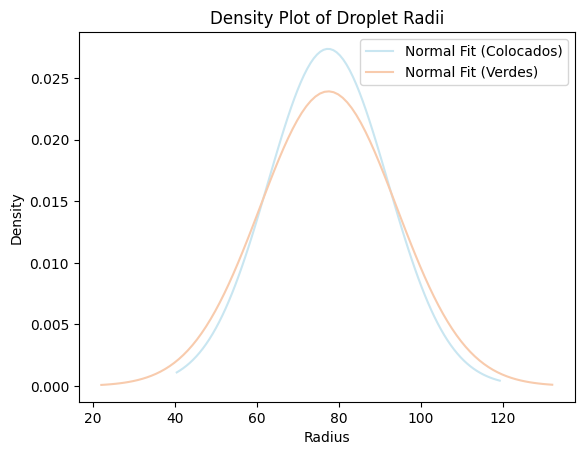

Estimated parameters for Camera 1:
μ (mu): 77.31488
σ (sigma): 14.58248766793924

Estimated parameters for Camera 2:
μ (mu): 77.38574423480084
σ (sigma): 16.684708666084354


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu_c1, sigma_c1 = norm.fit(colocados)

# Fit normal distribution to the data for Camera 2
mu_c2, sigma_c2 = norm.fit(verdes)

# Generate the x-axis values for the probability density functions (pdf)
x_c1 = np.linspace(min(colocados), max(colocados), 100)
x_c2 = np.linspace(min(verdes), max(verdes), 100)

# Compute the corresponding probability density functions (pdf)
pdf_c1 = norm.pdf(x_c1, mu_c1, sigma_c1)
pdf_c2 = norm.pdf(x_c2, mu_c2, sigma_c2)


col_color = (201/255, 230/255, 241/255)  # RGB tuple for a bluish color
ver_color = (248/255, 203/255, 173/255)  # RGB tuple for a reddish color

# Plotting the normal curves
plt.plot(x_c1, pdf_c1, color=col_color, label='Normal Fit (Colocados)')
plt.plot(x_c2, pdf_c2, color=ver_color, label='Normal Fit (Verdes)')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Plot of Droplet Radii')

plt.legend()

# Display the plot
plt.show()

# Print the estimated μ (mu) and σ (sigma) parameters
print("Estimated parameters for Camera 1:")
print("μ (mu):", mu_c1)
print("σ (sigma):", sigma_c1)

print("\nEstimated parameters for Camera 2:")
print("μ (mu):", mu_c2)
print("σ (sigma):", sigma_c2)

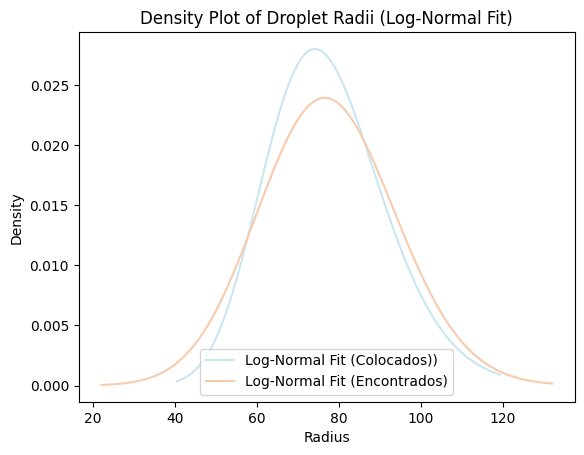

Estimated parameters for Log-Normal Fit (Annotated):
Shape: 0.14908722844257444
Location: -20.343793173803533
Scale: 96.58112159780316

Estimated parameters for Log-Normal Fit (Found):
Shape: 0.035578206366875795
Location: -391.39011679402245
Scale: 468.4792553174575


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

# Fit log-normal distribution to the data for Camera 1
shape_c1, loc_c1, scale_c1 = lognorm.fit(colocados)

# Fit log-normal distribution to the data for Camera 2
shape_c2, loc_c2, scale_c2 = lognorm.fit(verdes)

# Generate the x-axis values for the probability density functions (pdf)
x_c1 = np.linspace(min(colocados), max(colocados), 100)
x_c2 = np.linspace(min(verdes), max(verdes), 100)

# Compute the corresponding probability density functions (pdf)
pdf_c1 = lognorm.pdf(x_c1, shape_c1, loc=loc_c1, scale=scale_c1)
pdf_c2 = lognorm.pdf(x_c2, shape_c2, loc=loc_c2, scale=scale_c2)

col_color = (201/255, 230/255, 241/255)  # RGB tuple for a bluish color
ver_color = (248/255, 203/255, 173/255)  # RGB tuple for a reddish color

# Plotting the log-normal curves
plt.plot(x_c1, pdf_c1, color=col_color, label='Log-Normal Fit (Colocados))')
plt.plot(x_c2, pdf_c2, color=ver_color, label='Log-Normal Fit (Encontrados)')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Plot of Droplet Radii (Log-Normal Fit)')



plt.legend()

# Display the plot
plt.show()

# Print the estimated shape, location, and scale parameters for the log-normal distribution
print("Estimated parameters for Log-Normal Fit (Annotated):")
print("Shape:", shape_c1)
print("Location:", loc_c1)
print("Scale:", scale_c1)

print("\nEstimated parameters for Log-Normal Fit (Found):")
print("Shape:", shape_c2)
print("Location:", loc_c2)
print("Scale:", scale_c2)

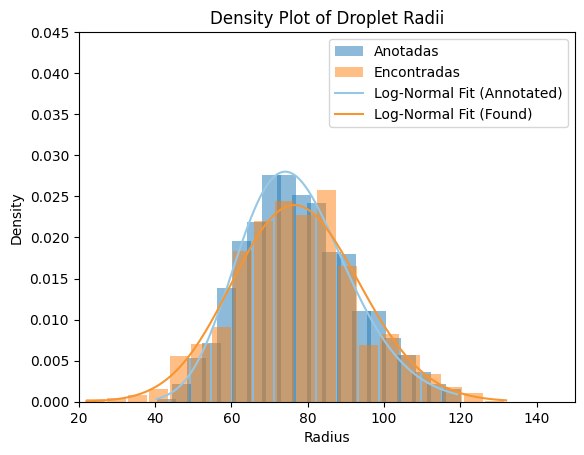


Estimated parameters for Log-Normal Fit (Annotated):
Shape: 0.14908722844257444
Loc: -20.343793173803533
Scale: 96.58112159780316

Estimated parameters for Log-Normal Fit (Found):
Shape: 0.035578206366875795
Loc: -391.39011679402245
Scale: 468.4792553174575


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
# Assuming you have the data for all_radii and all_radii_2
all_radii = colocados  # Replace [...] with your actual data
all_radii_2 = verdes # Replace [...] with your actual data

# Generate the x-axis values for the probability density function (pdf)
x = np.linspace((min(colocados)), max(colocados), 100)


# Plot the density histogram for all_radii with separated bars
plt.hist(all_radii, bins=20, density=True, alpha=0.5, label='Anotadas', width=5)

# Plot the density histogram for all_radii_2 with separated bars
plt.hist(all_radii_2, bins=20, density=True, alpha=0.5, label='Encontradas', width=5)


# Fit log-normal distribution to the data for Camera 1
shape_c1, loc_c1, scale_c1 = lognorm.fit(colocados)

# Fit log-normal distribution to the data for Camera 2
shape_c2, loc_c2, scale_c2 = lognorm.fit(verdes)

# Generate the x-axis values for the probability density functions (pdf)
x_c1 = np.linspace(min(colocados), max(colocados), 100)
x_c2 = np.linspace(min(verdes), max(verdes), 100)

# Compute the corresponding probability density functions (pdf)
pdf_c1 = lognorm.pdf(x_c1, shape_c1, loc=loc_c1, scale=scale_c1)
pdf_c2 = lognorm.pdf(x_c2, shape_c2, loc=loc_c2, scale=scale_c2)

darker_blue = (150/255, 200/255, 230/255)
darker_orange = (245/255, 150/255, 50/255)


# Plotting the log-normal curves
plt.plot(x_c1, pdf_c1, color=darker_blue, label='Log-Normal Fit (Annotated)')
plt.plot(x_c2, pdf_c2, color=darker_orange, label='Log-Normal Fit (Found)')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Plot of Droplet Radii')

plt.ylim(0, 0.045)
plt.xlim(20, 150)
plt.legend()

# Display the plot
plt.show()


# Print the estimated shape, loc, and scale parameters for the log-normal fits
print("\nEstimated parameters for Log-Normal Fit (Annotated):")
print("Shape:", shape_c1)
print("Loc:", loc_c1)
print("Scale:", scale_c1)

print("\nEstimated parameters for Log-Normal Fit (Found):")
print("Shape:", shape_c2)
print("Loc:", loc_c2)
print("Scale:", scale_c2)

MEDIUM IMPLEMENTATION

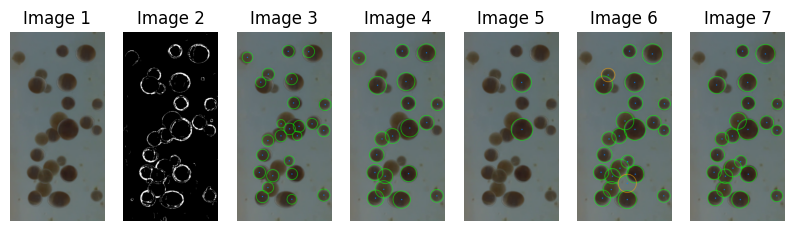

In [45]:

valid=f.detect_circles_color(final_z,canny_2,minR=35,maxR=150)

valid_img=valid[0]
green_valid=valid[3]


imagem_final_valid=d.draw_green_circles(green_valid,final_z)




imagens=[final_c,canny_2,first_image,second_image,third_image,valid_img,imagem_final_valid]

f.display_images(imagens)

detetados 22
recall: 88.0
precision: 100.0
(2000, 1000, 3)


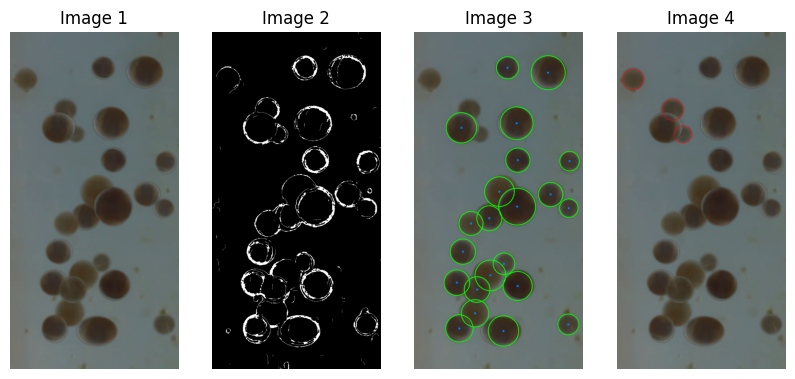

In [46]:

Valor=f.detect_circles_score(final_c,pos,rad,green_valid,tolerance=0.5,radius_margin=0.4)
print('recall:',Valor[0])
print('precision:',Valor[2])

print(final_c.shape)

imagens=[final_c,canny_2,imagem_final_valid,Valor[1]]

f.display_images(imagens)

detetados 23
detetados 21
detetados 22
detetados 20
detetados 19
detetados 23
detetados 24
detetados 22
detetados 20
detetados 23
detetados 21
detetados 17
detetados 23
detetados 23
detetados 24
detetados 21
detetados 25
detetados 24
detetados 19
detetados 21
detetados 24
detetados 24
detetados 20
detetados 24
detetados 23
detetados 19
detetados 23
detetados 23
detetados 22
detetados 25
detetados 22
detetados 22
detetados 23
detetados 20
detetados 21
detetados 21
detetados 23
detetados 22
detetados 21
detetados 22
detetados 21
detetados 22
detetados 24
detetados 21
detetados 24
detetados 23
detetados 21
detetados 21
detetados 21
detetados 24
detetados 21
detetados 21
detetados 23
detetados 20
detetados 23
detetados 22
detetados 23
detetados 22
detetados 25
detetados 25
detetados 23
detetados 23
detetados 21
detetados 22
detetados 24
detetados 21
detetados 22
detetados 21
detetados 23
detetados 21
detetados 24
detetados 19
detetados 20
detetados 22
detetados 24
detetados 20
detetados 23

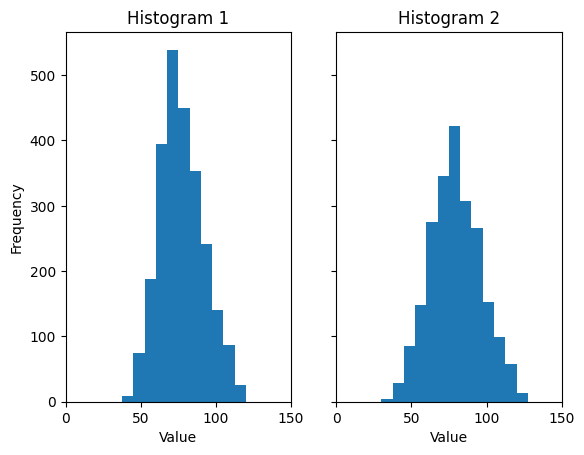

Sauter mean diameter for colocados: 85.4664159178646
Sauter mean diameter for encontrados: 89.33698290824276
A media dos diametros dos colocados é 77.27856
A media dos diametros dos encontrados é 79
A percentagem dos colocados encontrados é (Recall): 87.8
Precision: 99.51858965595808


In [47]:
#BAD HISTOGRAMA DOS COLOCADOS DO LADO ESQUERDO 
#HISTOGRAMA DOS ENCONTRADOS DO LADO DIREITO

n_ensaios=ENSAIO

#para dividir os bins nos mesmos intervalos


#print(one,two,tree,four)
colocados,verdes,recall_list,precision_list,Vol_placed, Vol_found=f.histrogram_data_final_valid(n_ensaios,caminho_bg,caminho_cell,n_cell,ov_percentage,diam_min,diam_max,probab_trans,probab_flat)
bins = 20
x_range = (0, 150)

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Plot the first histogram
ax1.hist(colocados, bins=bins, range=x_range)
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram 1')

# Plot the second histogram
ax2.hist(verdes, bins=bins, range=x_range)
ax2.set_xlabel('Value')
ax2.set_title('Histogram 2')

# Set the x-axis range for both subplots
ax1.set_xlim(x_range)
ax2.set_xlim(x_range)

# Display the figure
plt.show()


# Calculate the total volume of colocados spheres
colocados_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in colocados])

# Calculate the volume fraction of each colocados sphere
colocados_volume_fractions = [(4/3) * 3.14159 * radius**3 / colocados_total_volume for radius in colocados]

# Calculate the Sauter mean diameter for colocados
colocados_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(colocados, colocados_volume_fractions)])) / sum(colocados_volume_fractions)

# Calculate the total volume of verdes spheres
verdes_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in verdes])

# Calculate the volume fraction of each verdes sphere
verdes_volume_fractions = [(4/3) * 3.14159 * radius**3 / verdes_total_volume for radius in verdes]

# Calculate the Sauter mean diameter for verdes
verdes_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(verdes, verdes_volume_fractions)])) / sum(verdes_volume_fractions)

print("Sauter mean diameter for colocados:", colocados_sauter_mean_diameter)
print("Sauter mean diameter for encontrados:", verdes_sauter_mean_diameter)
# Calculate and print the statistics
print('A media dos diametros dos colocados é',statistics.mean(colocados))
print('A media dos diametros dos encontrados é',statistics.mean(verdes))
print('A percentagem dos colocados encontrados é (Recall):', statistics.mean(recall_list))
print('Precision:', statistics.mean(precision_list))

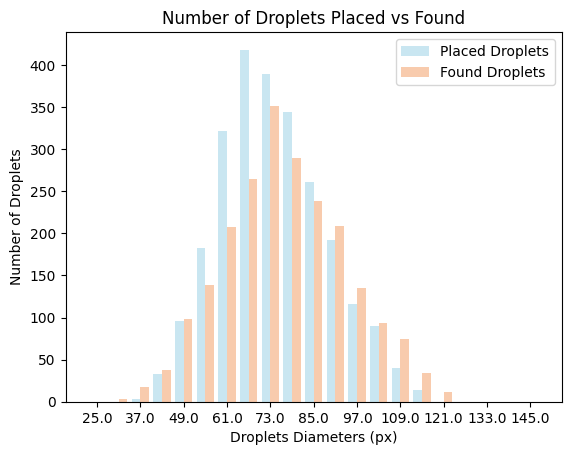

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diam_max and diam_min values
diam_max = 300
diam_min = 70

# Calculate the maximum and minimum radii
maxR = diam_max / 2
minR = (diam_min / 2)-10

# Calculate the sum and create the bins
sum_bins = int((maxR - minR) / 20)
bins = np.arange(minR, maxR + sum_bins, sum_bins)

# Compute the histograms
col = np.histogram(colocados, bins=bins)[0]
ver = np.histogram(verdes, bins=bins)[0]

X = [f'{bins[i]}' for i in range(len(bins)-1)] 

X_axis = np.arange(len(X))

col_color = (201/255, 230/255, 241/255)  # RGB tuple for a bluish color
ver_color = (248/255, 203/255, 173/255)  # RGB tuple for a reddish color

plt.bar(X_axis - 0.2, col, 0.4, label='Placed Droplets', color=col_color)
plt.bar(X_axis + 0.2, ver, 0.4, label='Found Droplets', color=ver_color)

plt.xticks(X_axis[::2], X[::2]) 
plt.xlabel("Droplets Diameters (px)")
plt.ylabel("Number of Droplets")
plt.title("Number of Droplets Placed vs Found")
plt.legend()
plt.show()

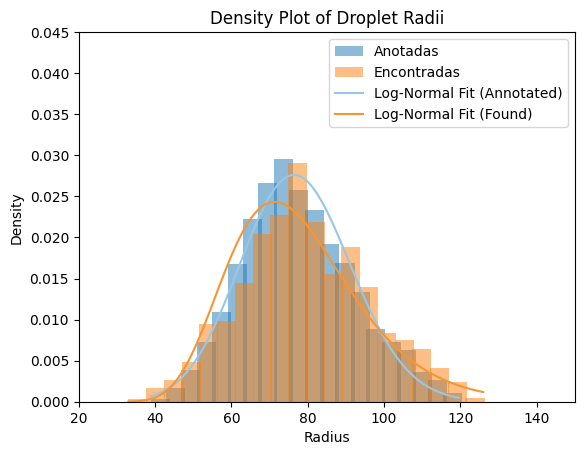


Estimated parameters for Log-Normal Fit (Annotated):
Shape: 0.03636022604250358
Loc: -320.58526315972574
Scale: 397.51437647935006

Estimated parameters for Log-Normal Fit (Found):
Shape: 0.2605548837834415
Loc: 10.528021699978769
Scale: 65.0858897691832


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
# Assuming you have the data for all_radii and all_radii_2
all_radii = colocados  # Replace [...] with your actual data
all_radii_2 = verdes # Replace [...] with your actual data

# Generate the x-axis values for the probability density function (pdf)
x = np.linspace((min(colocados)), max(colocados), 100)


# Plot the density histogram for all_radii with separated bars
plt.hist(all_radii, bins=20, density=True, alpha=0.5, label='Anotadas', width=5)

# Plot the density histogram for all_radii_2 with separated bars
plt.hist(all_radii_2, bins=20, density=True, alpha=0.5, label='Encontradas', width=5)


# Fit log-normal distribution to the data for Camera 1
shape_c1, loc_c1, scale_c1 = lognorm.fit(colocados)

# Fit log-normal distribution to the data for Camera 2
shape_c2, loc_c2, scale_c2 = lognorm.fit(verdes)

# Generate the x-axis values for the probability density functions (pdf)
x_c1 = np.linspace(min(colocados), max(colocados), 100)
x_c2 = np.linspace(min(verdes), max(verdes), 100)

# Compute the corresponding probability density functions (pdf)
pdf_c1 = lognorm.pdf(x_c1, shape_c1, loc=loc_c1, scale=scale_c1)
pdf_c2 = lognorm.pdf(x_c2, shape_c2, loc=loc_c2, scale=scale_c2)

darker_blue = (150/255, 200/255, 230/255)
darker_orange = (245/255, 150/255, 50/255)


# Plotting the log-normal curves
plt.plot(x_c1, pdf_c1, color=darker_blue, label='Log-Normal Fit (Annotated)')
plt.plot(x_c2, pdf_c2, color=darker_orange, label='Log-Normal Fit (Found)')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Plot of Droplet Radii')

plt.ylim(0, 0.045)
plt.xlim(20, 150)
plt.legend()

# Display the plot
plt.show()


# Print the estimated shape, loc, and scale parameters for the log-normal fits
print("\nEstimated parameters for Log-Normal Fit (Annotated):")
print("Shape:", shape_c1)
print("Loc:", loc_c1)
print("Scale:", scale_c1)

print("\nEstimated parameters for Log-Normal Fit (Found):")
print("Shape:", shape_c2)
print("Loc:", loc_c2)
print("Scale:", scale_c2)

BAD IMPLEMNTATION

23


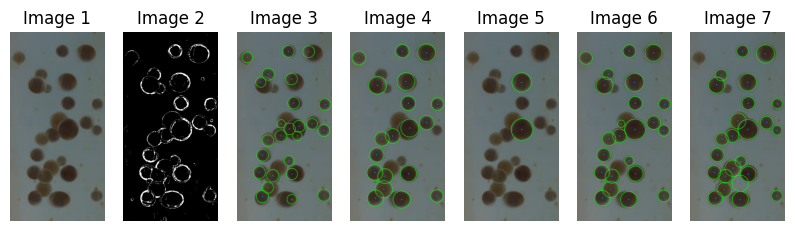

In [50]:

bad=d.detect_circles(final_z,canny_2,minR=35,maxR=150)

lista_bad=bad[1]
print(len(lista))
first_image=resultado[1]
second_image=resultado[2]
third_image=resultado[3]

imagem_final_bad=d.draw_green_circles(lista_bad,final_z)




imagens=[final_c,canny_2,first_image,second_image,third_image,imagem_final,imagem_final_bad]

f.display_images(imagens)

detetados 24
recall: 92.0
precision: 95.83333333333334
(2000, 1000, 3)


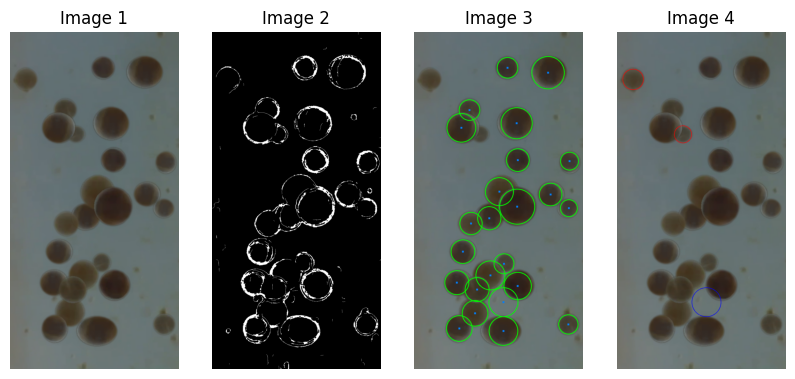

In [51]:

Valor=f.detect_circles_score(final_c,pos,rad,lista_bad,tolerance=0.5,radius_margin=0.4)
print('recall:',Valor[0])
print('precision:',Valor[2])

print(final_c.shape)

imagens=[final_c,canny_2,imagem_final_bad,Valor[1]]

f.display_images(imagens)

detetados 21
detetados 23
detetados 25
detetados 25
detetados 24
detetados 20
detetados 23
detetados 23
detetados 19
detetados 25
detetados 23
detetados 23
detetados 24
detetados 22
detetados 23
detetados 23
detetados 25
detetados 25
detetados 25
detetados 23
detetados 23
detetados 22
detetados 22
detetados 24
detetados 21
detetados 25
detetados 23
detetados 23
detetados 25
detetados 24
detetados 23
detetados 25
detetados 25
detetados 24
detetados 25
detetados 26
detetados 24
detetados 23
detetados 26
detetados 23
detetados 23
detetados 26
detetados 21
detetados 24
detetados 23
detetados 25
detetados 24
detetados 24
detetados 23
detetados 23
detetados 24
detetados 22
detetados 24
detetados 22
detetados 25
detetados 24
detetados 24
detetados 23
detetados 23
detetados 23
detetados 24
detetados 25
detetados 23
detetados 23
detetados 20
detetados 24
detetados 26
detetados 23
detetados 24
detetados 26
detetados 20
detetados 22
detetados 24
detetados 22
detetados 26
detetados 22
detetados 23

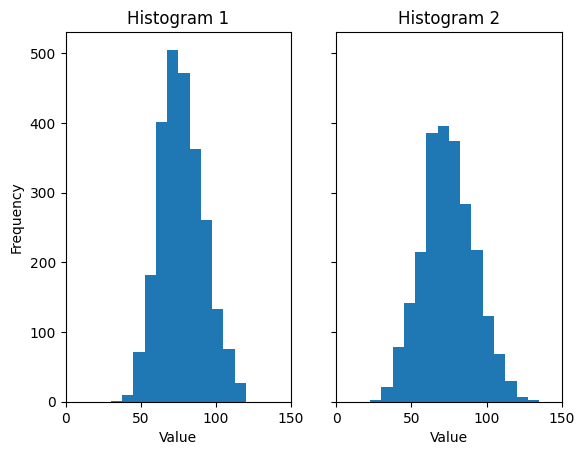

Sauter mean diameter for colocados: 85.33785025581584
Sauter mean diameter for encontrados: 85.56292111272127
A media dos diametros dos colocados é 77.24544
A media dos diametros dos encontrados é 74
A percentagem dos colocados encontrados é (Recall): 90.8
Precision: 96.84871975850237


In [52]:
#BAD HISTOGRAMA DOS COLOCADOS DO LADO ESQUERDO 
#HISTOGRAMA DOS ENCONTRADOS DO LADO DIREITO

n_ensaios=ENSAIO

#para dividir os bins nos mesmos intervalos
diam_max = 300
diam_min = 70

#print(one,two,tree,four)
colocados,verdes,recall_list,precision_list,Vol_placed, Vol_found=f.histrogram_data_final_bad(n_ensaios,caminho_bg,caminho_cell,n_cell,ov_percentage,diam_min,diam_max,probab_trans,probab_flat)
bins = 20
x_range = (0, 150)

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Plot the first histogram
ax1.hist(colocados, bins=bins, range=x_range)
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram 1')

# Plot the second histogram
ax2.hist(verdes, bins=bins, range=x_range)
ax2.set_xlabel('Value')
ax2.set_title('Histogram 2')

# Set the x-axis range for both subplots
ax1.set_xlim(x_range)
ax2.set_xlim(x_range)

# Display the figure
plt.show()


# Calculate the total volume of colocados spheres
colocados_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in colocados])

# Calculate the volume fraction of each colocados sphere
colocados_volume_fractions = [(4/3) * 3.14159 * radius**3 / colocados_total_volume for radius in colocados]

# Calculate the Sauter mean diameter for colocados
colocados_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(colocados, colocados_volume_fractions)])) / sum(colocados_volume_fractions)

# Calculate the total volume of verdes spheres
verdes_total_volume = sum([(4/3) * 3.14159 * radius**3 for radius in verdes])

# Calculate the volume fraction of each verdes sphere
verdes_volume_fractions = [(4/3) * 3.14159 * radius**3 / verdes_total_volume for radius in verdes]

# Calculate the Sauter mean diameter for verdes
verdes_sauter_mean_diameter = (sum([(radius * vf) for radius, vf in zip(verdes, verdes_volume_fractions)])) / sum(verdes_volume_fractions)

print("Sauter mean diameter for colocados:", colocados_sauter_mean_diameter)
print("Sauter mean diameter for encontrados:", verdes_sauter_mean_diameter)
# Calculate and print the statistics
print('A media dos diametros dos colocados é',statistics.mean(colocados))
print('A media dos diametros dos encontrados é',statistics.mean(verdes))
print('A percentagem dos colocados encontrados é (Recall):', statistics.mean(recall_list))
print('Precision:', statistics.mean(precision_list))

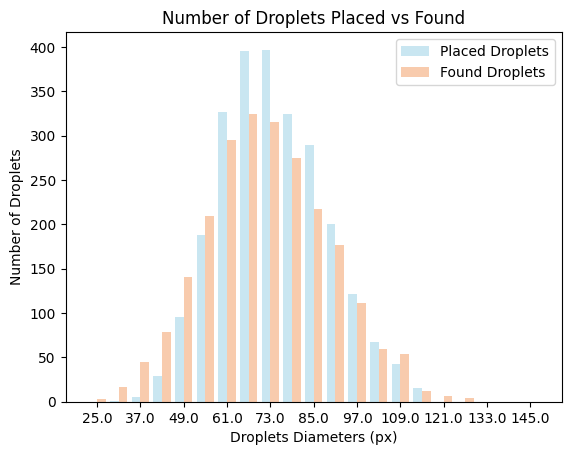

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diam_max and diam_min values
diam_max = 300
diam_min = 70

# Calculate the maximum and minimum radii
maxR = diam_max / 2
minR = (diam_min / 2)-10

# Calculate the sum and create the bins
sum_bins = int((maxR - minR) / 20)
bins = np.arange(minR, maxR + sum_bins, sum_bins)

# Compute the histograms
col = np.histogram(colocados, bins=bins)[0]
ver = np.histogram(verdes, bins=bins)[0]

X = [f'{bins[i]}' for i in range(len(bins)-1)] 

X_axis = np.arange(len(X))

col_color = (201/255, 230/255, 241/255)  # RGB tuple for a bluish color
ver_color = (248/255, 203/255, 173/255)  # RGB tuple for a reddish color

plt.bar(X_axis - 0.2, col, 0.4, label='Placed Droplets', color=col_color)
plt.bar(X_axis + 0.2, ver, 0.4, label='Found Droplets', color=ver_color)

plt.xticks(X_axis[::2], X[::2]) 
plt.xlabel("Droplets Diameters (px)")
plt.ylabel("Number of Droplets")
plt.title("Number of Droplets Placed vs Found")
plt.legend()
plt.show()

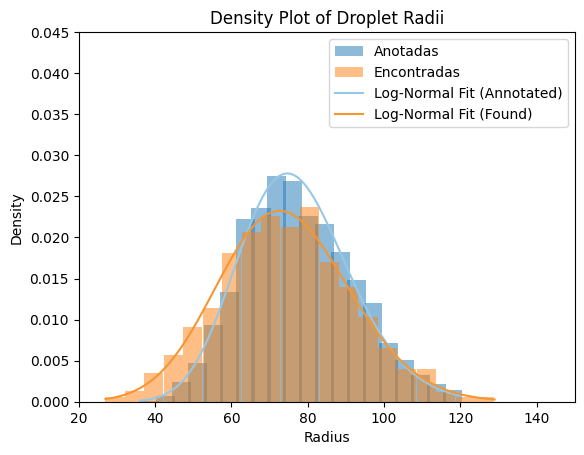


Estimated parameters for Log-Normal Fit (Annotated):
Shape: 0.11991000780826702
Loc: -44.16421583829672
Scale: 120.54069427758128

Estimated parameters for Log-Normal Fit (Found):
Shape: 0.06440466075379638
Loc: -193.3097134053058
Scale: 267.062672336845


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
# Assuming you have the data for all_radii and all_radii_2
all_radii = colocados  # Replace [...] with your actual data
all_radii_2 = verdes # Replace [...] with your actual data

# Generate the x-axis values for the probability density function (pdf)
x = np.linspace((min(colocados)), max(colocados), 100)


# Plot the density histogram for all_radii with separated bars
plt.hist(all_radii, bins=20, density=True, alpha=0.5, label='Anotadas', width=5)

# Plot the density histogram for all_radii_2 with separated bars
plt.hist(all_radii_2, bins=20, density=True, alpha=0.5, label='Encontradas', width=5)


# Fit log-normal distribution to the data for Camera 1
shape_c1, loc_c1, scale_c1 = lognorm.fit(colocados)

# Fit log-normal distribution to the data for Camera 2
shape_c2, loc_c2, scale_c2 = lognorm.fit(verdes)

# Generate the x-axis values for the probability density functions (pdf)
x_c1 = np.linspace(min(colocados), max(colocados), 100)
x_c2 = np.linspace(min(verdes), max(verdes), 100)

# Compute the corresponding probability density functions (pdf)
pdf_c1 = lognorm.pdf(x_c1, shape_c1, loc=loc_c1, scale=scale_c1)
pdf_c2 = lognorm.pdf(x_c2, shape_c2, loc=loc_c2, scale=scale_c2)

darker_blue = (150/255, 200/255, 230/255)
darker_orange = (245/255, 150/255, 50/255)


# Plotting the log-normal curves
plt.plot(x_c1, pdf_c1, color=darker_blue, label='Log-Normal Fit (Annotated)')
plt.plot(x_c2, pdf_c2, color=darker_orange, label='Log-Normal Fit (Found)')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Plot of Droplet Radii')

plt.ylim(0, 0.045)
plt.xlim(20, 150)
plt.legend()

# Display the plot
plt.show()


# Print the estimated shape, loc, and scale parameters for the log-normal fits
print("\nEstimated parameters for Log-Normal Fit (Annotated):")
print("Shape:", shape_c1)
print("Loc:", loc_c1)
print("Scale:", scale_c1)

print("\nEstimated parameters for Log-Normal Fit (Found):")
print("Shape:", shape_c2)
print("Loc:", loc_c2)
print("Scale:", scale_c2)

FINAL
